# Top 10 Safest Neighborhoods in Pittsburgh

For my part of the project, I wanted to look at the safety aspect of the neighborhoods. After going through a couple of data sets from the Western Pennsylvania
Regional Data Center, I found one which showed a list of police incidents of crime in various neighborhoods throughout Pittsburgh. I felt that this would be a perfect data set to get an idea of where there is more crime in addition to where there are more harsher crimes. Through that data, I was able to come across the top 10 safest neighborhoods in Pittsburgh through creating a weight or value for each neighborhood based on the number and severity of the incidents and identifying the neighborhoods with the smallest weight.

In [28]:
# imported pandas and matplotlib to use
import pandas as pd
import matplotlib.pyplot as plt

# accessed the data set I was using
safety = pd.read_csv("PoliceIncidents.csv") 
safety.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


In [29]:
# deleted all the columns except the neighborhoods and the incidents
safety = safety[['INCIDENTNEIGHBORHOOD','INCIDENTHIERARCHYDESC']]
safety.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC
0,North Shore,HARRASSMENT/THREAT/ATTEMPT/PHY
1,Upper Lawrenceville,THEFT BY DECEPTION
2,Northview Heights,DISCHARGE OF FIREARM INTO OCC.STRUCTURE
3,Golden Triangle/Civic Arena,HARRASSMENT/THREAT/ATTEMPT/PHY
4,Northview Heights,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY
5,South Side Flats,PUBLIC DRUNKENESS
6,Elliott,AGG ASSAULT/OTHER/INJURY
7,South Side Flats,PUBLIC DRUNKENESS
8,Homewood North,HARRASSMENT/THREAT/ATTEMPT/PHY
9,South Side Slopes,BURGLARY/FORCE ENT/RES


In [30]:
# created a DataFrame to just store all the possible incidents that have occurred and got rid of the duplicates from the original data set
incidents = safety[['INCIDENTHIERARCHYDESC']].copy()
incidents.drop_duplicates(ignore_index=True)

# displayed a new column that kept count of the number of duplicates for each incident in the data set
incidents.groupby(incidents.columns.tolist(),as_index=False).size().sort_values(by="size", ascending=False).head(20)

,INCIDENTHIERARCHYDESC,size
281,THEFT FROM AUTO,17451
288,THEFT/ALL OTHERS,15314
266,SIMPLE ASSAULT/INJURY,12663
91,CRIMINAL MISCHIEF (AUTO),11395
214,RETAIL THEFT (SHOPLIFTING),8963
137,HARRASSMENT/THREAT/ATTEMPT/PHY,8694
90,CRIMINAL MISCHIEF,8455
174,MTR VEH THEFT (AUTO),6885
136,HARRASSMENT-OTHER,5777
135,HARRASSMENT BY COMUN/ADDRESS,5076


### Weights for the top 10 most relevant incidents + murder
The weights for the ten most relevant incidents which is found from the number of times each type of incident has occurred in Pittsburgh in addition to murder.

**THEFT FROM AUTO** = 8

**THEFT/ALL OTHERS** = 8

**SIMPLE ASSAULT/INJURY** = 15

**CRIMINAL MISCHIEF (AUTO)** = 5

**RETAIL THEFT (SHOPLIFTING)** = 5

**HARRASSMENT/THREAT/ATTEMPT/PHY** = 15

**CRIMINAL MISCHIEF** = 5

**MTR VEH THEFT (AUTO)** = 8

**HARRASSMENT-OTHER** = 10

**HARRASSMENT BY COMUN/ADDRESS** = 10

**MURDER/NON-NEG/MANSLTR-OTHER** = 20

**OTHER** = 2

In [31]:
# a dictionary is created to keep count of the value for the weight for each neighborhood
weight = 0
count = dict()

# loops through the entire original data set to figure out the incidents that have happened in each neighborhood
for row in range(len(safety)):
    current = safety.loc[row, "INCIDENTHIERARCHYDESC"]
    neighbrhd = safety.loc[row, "INCIDENTNEIGHBORHOOD"]
    
    # a value is given for a weight based on the severity of the crime
    if current in ["THEFT FROM AUTO", "THEFT/ALL OTHERS", "MTR VEH THEFT (AUTO)"]:
        weight = 8
    elif current in ["SIMPLE ASSAULT/INJURY", "HARRASSMENT/THREAT/ATTEMPT/PHY"]:
        weight = 15
    elif current in ["CRIMINAL MISCHIEF (AUTO)", "RETAIL THEFT (SHOPLIFTING)", "CRIMINAL MISCHIEF"]:
        weight = 5
    elif current in ["HARRASSMENT-OTHER", "HARRASSMENT BY COMUN/ADDRESS"]:
        weight = 10
    elif current=="MURDER/NON-NEG/MANSLTR-OTHER":
        weight = 20
    else:
        weight = 2
    
    # if a key exists for that neighborhood in the dictionary then the weight is added to the current value related to the key 
    # otherwise a new key is created for the neighborhood
    if neighbrhd in count:
        count[neighbrhd] = count[neighbrhd] + weight
    else:
        count[neighbrhd] = weight
    
print(count)

{'North Shore': 14480, 'Upper Lawrenceville': 6728, 'Northview Heights': 11786, 'Golden Triangle/Civic Arena': 18249, 'South Side Flats': 72219, 'Elliott': 10819, 'Homewood North': 27237, 'South Side Slopes': 17057, 'Carrick': 50504, 'South Oakland': 9132, nan: 16606, 'Bloomfield': 36099, 'Beechview': 22859, 'Bluff': 17236, 'Strip District': 13370, 'Mount Washington': 31220, 'East Carnegie': 1883, 'Crafton Heights': 12053, 'Marshall-Shadeland': 23607, 'East Liberty': 35074, 'East Allegheny': 21613, 'Friendship': 7264, 'Arlington': 9851, 'Central Northside': 3507, 'Spring Hill-City View': 10824, 'Brighton Heights': 26392, 'Westwood': 6820, 'East Hills': 21899, 'Brookline': 31594, 'South Shore': 3983, 'Lower Lawrenceville': 10243, 'Bedford Dwellings': 12372, 'Troy Hill-Herrs Island': 1007, 'Central Oakland': 19794, 'Garfield': 13797, 'West End': 3512, 'West Oakland': 7833, 'Central Lawrenceville': 17473, 'Lincoln-Lemington-Belmar': 28261, 'Sheraden': 24986, 'Beltzhoover': 8261, 'Outside 

In [32]:
# the dictionary is converted into a Series and then converted into a DataFrame with a labeled column for the weight which 
# is shown in relation to its neighborhood key
countS = pd.Series(count)
countDF = pd.DataFrame(countS, columns=["WEIGHT"])
countDF.head(20)

,WEIGHT
North Shore,14480
Upper Lawrenceville,6728
Northview Heights,11786
Golden Triangle/Civic Arena,18249
South Side Flats,72219
Elliott,10819
Homewood North,27237
South Side Slopes,17057
Carrick,50504
South Oakland,9132


In [33]:
# the weight values are sorted and shown in ascending order to show the safest neighborhoods
countDF.sort_values(by="WEIGHT", ascending=True, ignore_index=False).head(20)

,WEIGHT
Mt. Oliver Boro,405
Mt. Oliver Neighborhood,516
Outside County,598
Outside State,1006
Troy Hill-Herrs Island,1007
Ridgemont,1226
Chartiers City,1315
New Homestead,1432
East Carnegie,1883
Swisshelm Park,1980


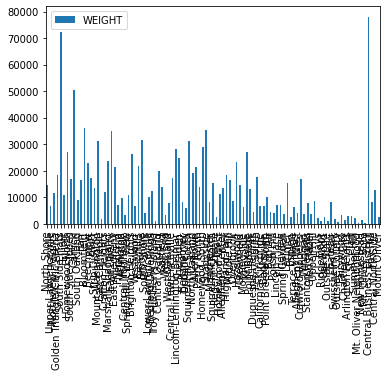

In [34]:
# all the weights and paired neighborhoods are shown on the bar graph
countDF.plot.bar()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

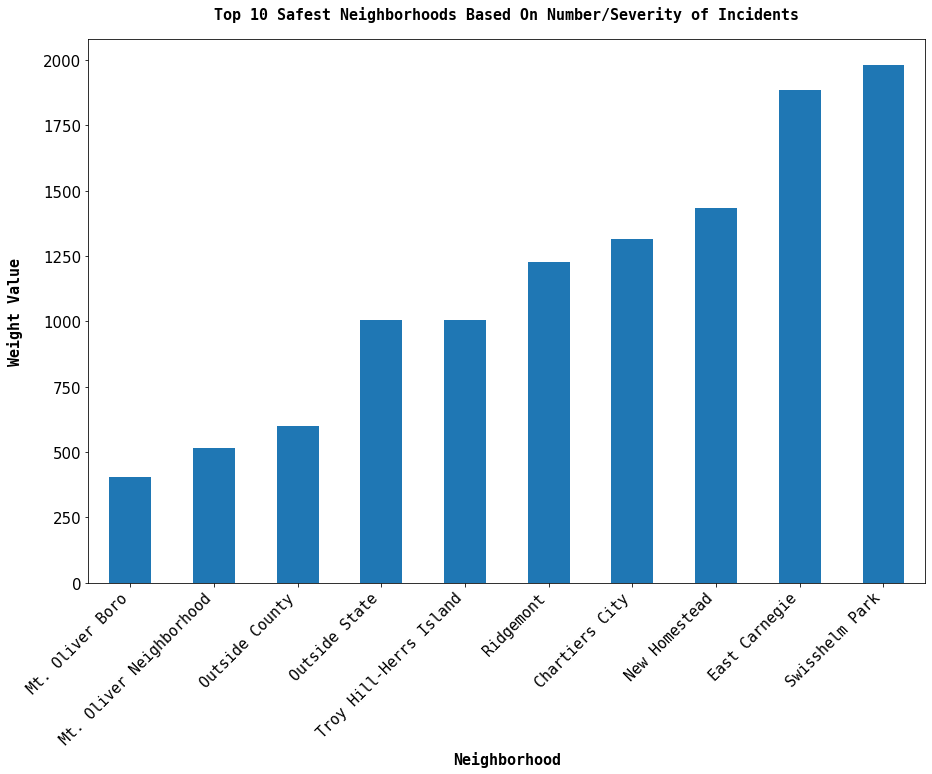

In [36]:
# a final DataFrame is created which only contains the top 10 safest neighborhoods or the 10 neighborhoods with the smallest weight value
finalNeighborhoods = countDF.sort_values(by="WEIGHT", ascending=True, ignore_index=False).head(10).copy()

# created a bar graph displaying the 10 safest neighborhoods in Pittsburgh based on the weights calculated from the data set
finalNeighborhoods.plot(kind="bar", legend=False, figsize = (15,10), fontsize=15)
plt.title('Top 10 Safest Neighborhoods Based On Number/Severity of Incidents', fontname = 'monospace', fontsize = 15, pad = 20, weight = 'bold')
plt.xlabel('Neighborhood', fontsize = 15, fontname = 'monospace', weight = 'bold')
plt.ylabel('Weight Value', fontsize = 15, labelpad = 20, fontname = 'monospace', weight = 'bold')
plt.xticks(rotation = 45, ha = 'right', fontname = 'monospace', size = 15, weight = 'normal')

### Conclusion:

Through going through all of the crime incidents given in the original data set and creating a weight value based on the severity of all the incidents that had  occurred for each neighborhood, I was able to find the top 10 safest neighborhoods or the ten neighborhoods that had the smallest weights. In conclusion, the best neighborhood in Pittsburgh is Mt. Oliver Boro since it has the smallest weight of 405 and is considered the safest based on my data or recorded incidents. However, personally my favorite neighborhood is Squirrel Hill South because of how ideal the neighborhood is for a residential area. The location is pretty central where it is close by to a couple of schools in addition to being right by Waterfront which is a large shopping center. Even though neighborhood is a little expensive, it is the perfect place to raise a family in a more suburban setting while not leaving the city.